In [1]:
%load_ext autoreload
%autoreload 2

# Watermarking

 is a technique used to embed a hidden, identifiable marker or pattern within digital content, such as images, videos, or in this case, Deep Neural Networks (DNNs). The purpose of watermarking is to establish ownership, verify authenticity, or protect against unauthorized use or distribution of the content. In the context of DNNs, watermarking involves incorporating a unique watermark into the model, allowing the model's owner to trace and identify it, even when it is deployed or shared with third parties. This provides a means of protecting the intellectual property associated with the DNN and detecting potential unauthorized usage or modifications.

 To address the challenges of protecting intellectual property in the context of Deep Neural Networks (DNNs), we examine the paper titled "Turning Your Weakness Into a Strength: Watermarking Deep Neural Networks by Backdooring."
 The code for this paper is available online on [github](https://github.com/adiyoss/WatermarkNN/tree/master).

## CODE

 We slightly modified the code and uploaded our version on [github](https://github.com/e11824496/SPEML_E2) and clone it in this Colab-Notebook.

In [2]:
!git clone https://github.com/e11824496/SPEML_E2.git

Cloning into 'SPEML_E2'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 205 (delta 49), reused 186 (delta 33), pack-reused 0
Receiving objects: 100% (205/205), 16.30 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
%cd ./SPEML_E2/WatermarkNN/

/content/SPEML_E2/WatermarkNN


## Load Config


In order to evaluate the effectiveness of the proposed approach, we conduct experiments using two widely used datasets recommended for this assignment: MNIST and the CIFAR-10 dataset. MNIST is a dataset consisting of handwritten digit images, commonly used for image classification tasks. CIFAR-10, on the other hand, is a dataset containing 60,000 color images across ten different classes, making it suitable for evaluating the performance of classification models on more complex visual recognition tasks. By testing our approach on these diverse datasets, we are able to assess its robustness and applicability in various scenarios.

In [6]:
from helpers.loaders import *
from helpers.utils import load_yaml

args = load_yaml('densenet_mnist_config.yaml')

## Train without Watermark

To evaluate the fidelity of this approach, we train our model once without the watermark (wm). This enables us to see if there is a performance penalty for including the watermark in our model.

In [7]:
from train import train

args.wmtrain = False
acc_wom = train(args)

Using MNIST dataset.
==> Building model..
Using CUDA
Parallel training on 1 GPUs.

Epoch: 0


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 1


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 2


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 3


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 4


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 5


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 6


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 7


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 8


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..

Epoch: 9


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

Saving..


## Train with Watermark

Here we train the same model on the same dataset but include the watermark images. This enables us to test for effectiveness, the ability to learn our watermarking and compare it with the previous training to see if we took a penalty on our regular dataset.

In [8]:
args.wmtrain = True
acc_wm, wm_acc_lst = train(args)

Using MNIST dataset.
Loading watermark images
==> Building model..
Using CUDA
Parallel training on 1 GPUs.
WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]


Epoch: 0


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 1


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 2


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 3


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 4


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 5


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 6


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 7


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 8


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..

Epoch: 9


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/50 [00:00<?, ?it/s]

Saving..


## Fine tune

With fine-tuning we test for robustness, the ability to still have the watermarking even after finetuning the model.

In [17]:
from fine_tune import fine_tune
acc_finetune, wm_acc_finetune = fine_tune(args)

/content/SPEML_E2/WatermarkNN/fine_tune.py:58: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if device is 'cuda':
/content/SPEML_E2/WatermarkNN/fine_tune.py:92: SyntaxWarning: "is" with a literal. Did you mean "=="?
  'net': net.module if device is 'cuda' else net,


Using MNIST dataset.
Loading watermark images
==> loading model...
Using CUDA
Parallel training on 1 GPUs.
WM acc:


  0%|          | 0/1 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]


Epoch: 10


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/1 [00:00<?, ?it/s]

Saving..

Epoch: 11


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/1 [00:00<?, ?it/s]

Saving..

Epoch: 12


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/1 [00:00<?, ?it/s]

Saving..

Epoch: 13


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/1 [00:00<?, ?it/s]

Saving..

Epoch: 14


  0%|          | 0/600 [00:00<?, ?it/s]

Test acc:


  0%|          | 0/100 [00:00<?, ?it/s]

WM acc:


  0%|          | 0/1 [00:00<?, ?it/s]

Saving..


## Results

First we check the evolution of the Accuracy for our Test-set, which comes for the original dataset, as well as the watermarking trigger set.

(0.0, 110.0)

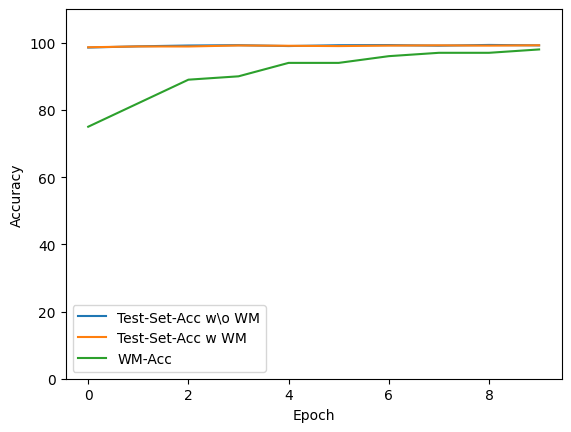

In [10]:
import matplotlib.pyplot as plt
plt.plot(acc_wom, label = 'Test-Set-Acc w\o WM')
plt.plot(acc_wm, label = 'Test-Set-Acc w WM')
plt.plot(wm_acc_lst, label = 'WM-Acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0,110))

We can also see the impact of fine-tuning on the test-set accuracy and trigger set accuracy from our watermarking.

(0.0, 110.0)

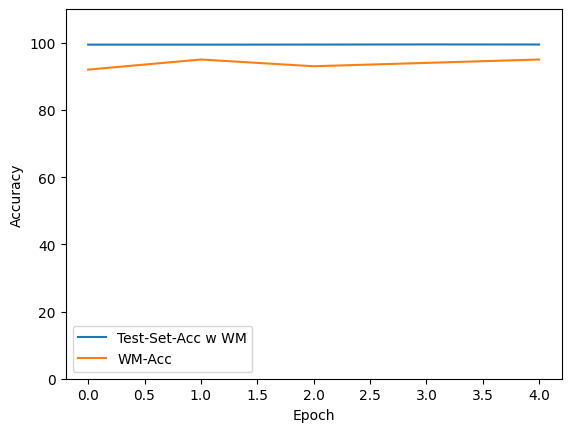

In [18]:
plt.plot(acc_finetune, label = 'Test-Set-Acc w WM')
plt.plot(wm_acc_finetune, label = 'WM-Acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim((0,110))

In [19]:
acc_wom

[98.55999755859375,
 98.93000030517578,
 99.16999816894531,
 99.2699966430664,
 99.01000213623047,
 99.26000213623047,
 99.30000305175781,
 99.12000274658203,
 99.33999633789062,
 99.20999908447266]

In [20]:
acc_wm

[98.6500015258789,
 98.88999938964844,
 98.87999725341797,
 99.18000030517578,
 99.08999633789062,
 99.0,
 99.13999938964844,
 99.22000122070312,
 99.12999725341797,
 99.23999786376953]

In [21]:
wm_acc_lst

[75.0, 82.0, 89.0, 90.0, 94.0, 94.0, 96.0, 97.0, 97.0, 98.0]

In [22]:
acc_finetune

[99.43000030517578,
 99.43000030517578,
 99.44999694824219,
 99.48999786376953,
 99.47000122070312]

In [23]:
wm_acc_finetune

[92.0, 95.0, 93.0, 94.0, 95.0]